In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df = train_df.drop('baseFare', axis=1)
test_df = test_df.drop('baseFare', axis=1)

In [3]:
y_train = train_df[['totalFare']]
x_train = train_df.drop('totalFare', axis=1)
y_test = test_df[['totalFare']]
x_test = test_df.drop('totalFare', axis=1)

In [4]:
x_train

,days_to_depart,flight_day_of_week,isDeparture_time_6to18,isArriving_time_11to24,stops,travelDuration_h,elapsedDays,isBasicEconomy,isNonStop,seatsRemaining,...,class_first,class_first+coach,class_first+coach+first,class_premium coach,class_premium coach+coach,destinationAirport_ATL,destinationAirport_DFW,destinationAirport_JFK,destinationAirport_LAX,destinationAirport_ORD
0,39.0,5.0,1.0,1.0,1.0,8.233333,0.0,1.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.0,1.0,1.0,0.0,3.100000,0.0,1.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,14.0,1.0,1.0,0.0,0.0,2.316667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21.0,1.0,1.0,1.0,2.0,10.150000,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,27.0,0.0,1.0,0.0,0.0,5.416667,1.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71026,27.0,0.0,1.0,1.0,0.0,2.566667,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71027,51.0,3.0,1.0,1.0,1.0,8.116667,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71028,23.0,3.0,1.0,1.0,1.0,7.133333,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
71029,23.0,3.0,1.0,1.0,1.0,4.566667,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
from Modeling_reg import Regression_models

Reg_models = Regression_models(x_train, y_train, x_test, y_test, standardlise=True)

## XGBoost

Best parameters:  {'n_estimators': 200, 'max_depth': 10, 'alpha': None}
XGBR train R_sq:  0.9788392927116855
XGBR train MSE:  620.9726438160653
XGBR test R_sq:  0.8699629131331927
XGBR test MSE:  4155.467750660988


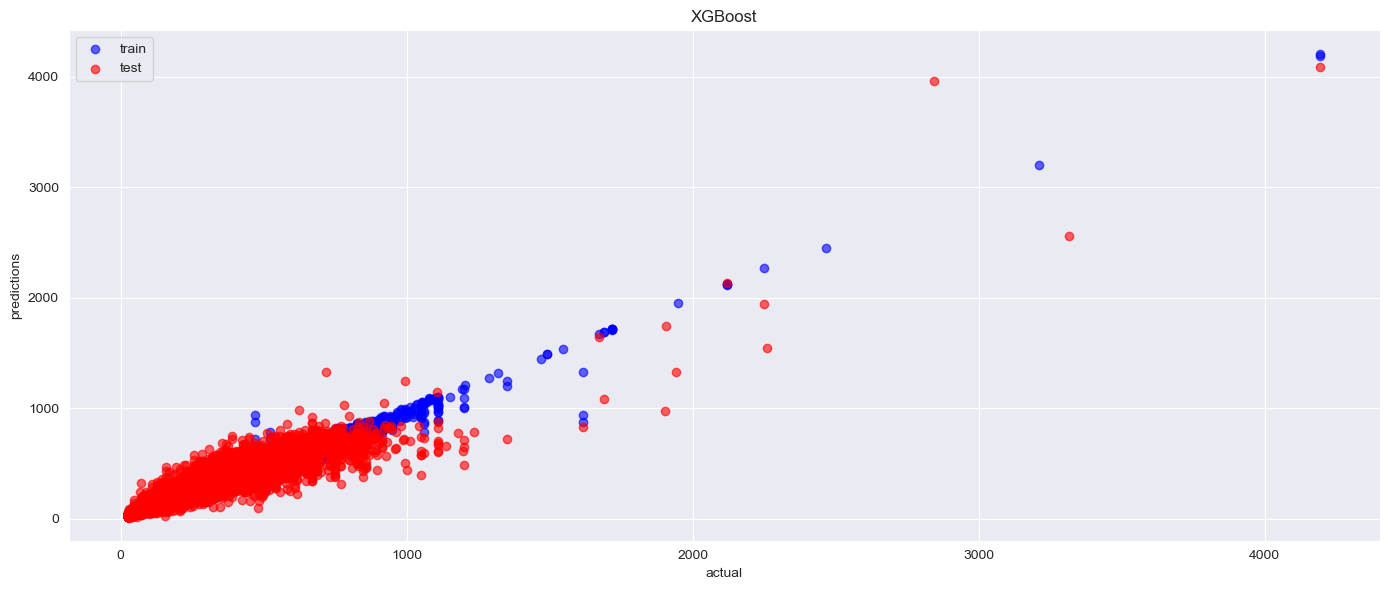

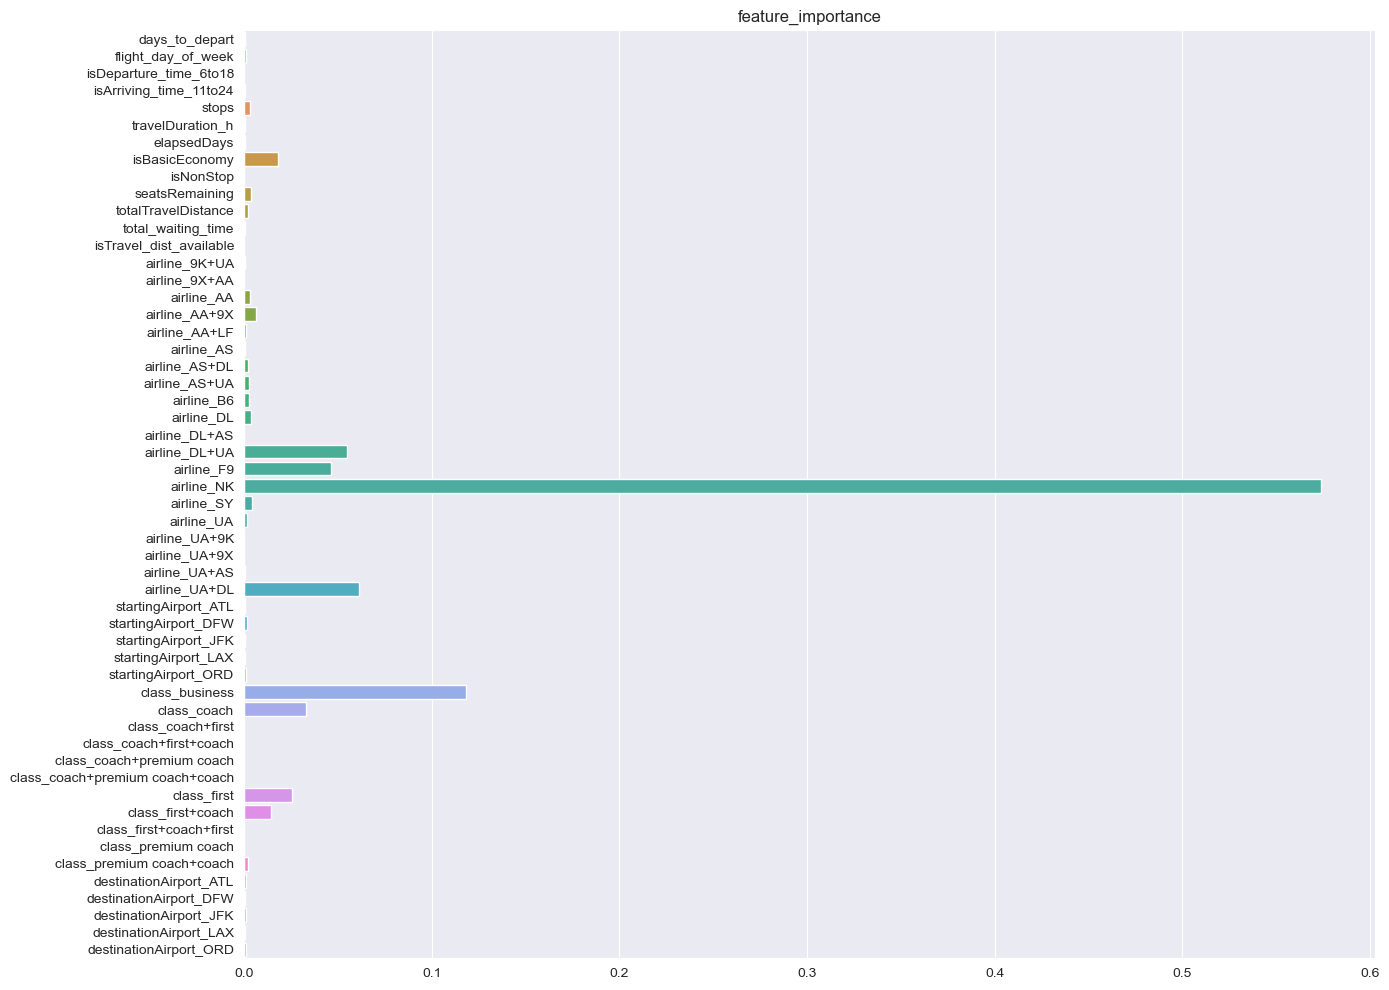

In [6]:
# best para: 150, 10 alpha = 1, by GridsearchCV
xgb_model = Reg_models.XGBR(search=False, best_depth_input=10, best_Nestimators=200, show_avsp=True,
                            show_features_imp=True, search_L1_alpha=False, L1_alpha=None)

In [7]:
xgb_features_imp_df = pd.DataFrame(data={'features': np.array(Reg_models.features_names_list),
                                         'importance': xgb_model.feature_importances_}).sort_values('importance',
                                                                                                    ascending=False)
xgb_features_imp_df

,features,importance
26,airline_NK,0.573813
38,class_business,0.118143
32,airline_UA+DL,0.061166
24,airline_DL+UA,0.054626
25,airline_F9,0.046118
39,class_coach,0.033205
44,class_first,0.025393
7,isBasicEconomy,0.018286
45,class_first+coach,0.014625
16,airline_AA+9X,0.006585


In [8]:
xgb_train_info_df = Reg_models.xgb_train_info_df
xgb_test_info_df = Reg_models.xgb_test_info_df

In [9]:
def bad_learning(true, pred):
    ae = np.abs(true - pred)
    threshold = np.percentile(ae, 95)
    # return index where mse>threshold
    outliers_array = np.where(ae > threshold)[0]
    return outliers_array

In [14]:
xgb_bad_index = bad_learning(xgb_train_info_df['true'], xgb_train_info_df['pred'])
xgb_bad_df = xgb_train_info_df.iloc[xgb_bad_index]

In [16]:
xgb_bad_df

,true,pred
34,367.20,421.167908
76,468.91,375.118500
77,485.19,356.180573
97,748.20,682.175293
129,599.20,464.077576
...,...,...
70915,548.20,449.690674
70917,511.70,454.057648
70971,709.19,631.460632
70983,488.90,427.410309


In [19]:
# xgb_bad_df.to_csv('data/xgb_bad_learn.csv',index=True)

## NN

In [ ]:
seq_NN = Reg_models.NN_sequential(epoch_num=100, loss_func='rmse')

2023-04-13 20:24:05.060695: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-13 20:24:05.063360: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 20:24:05.145932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
237/237 [==============================] - 2s 5ms/step - loss: 184.6216 - r_squared: -0.5448
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 85.2237 - r_squared: 0.7522
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 84.0211 - r_squared: 0.7551
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 81.7406 - r_squared: 0.7651
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 82.0311 - r_squared: 0.7716
Epoch 6/100
237/237 [==============================] - 1s 6ms/step - loss: 80.4826 - r_squared: 0.7742
Epoch 7/100
237/237 [==============================] - 1s 5ms/step - loss: 78.8725 - r_squared: 0.7823
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 77.9279 - r_squared: 0.7882
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 77.5588 - r_squared: 0.7923
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - l

## We shall consider the model with regulization term and different loss function.
From the feature importance of XGBoost, we found that there are many features which have less importance, indicating that they may be irrelevant. Hence, we shall consider L1 regularization

Moreover, recall that the data distribution from EDA, the prices seemed to be imbalanced. But here we deal with continuous data regression, it is hard for us to re-balance the data by resampling, hence, we shall also consider the loss function 'Balanced MSE' for our neural network.

L1 regularization, also known as Lasso regularization, adds a penalty term to the objective function that is proportional to the sum of the absolute values of the model coefficients. This penalty encourages the model to use fewer features by setting the coefficients of irrelevant or redundant features to zero, effectively performing feature selection. L1 regularization can also help to make the model more robust to outliers.

L2 regularization, also known as Ridge regularization, adds a penalty term to the objective function that is proportional to the sum of the squares of the model coefficients. This penalty encourages the model to use smaller values for the coefficients, effectively shrinking them towards zero. This can help to reduce the variance of the model, making it less sensitive to small changes in the input data.

L1 regularization tends to work well when the dataset contains many irrelevant or redundant features, as it helps to perform feature selection by setting the coefficients of these features to zero. L1 regularization can also help when you have limited data and want to reduce the model complexity to avoid overfitting.

On the other hand, L2 regularization tends to work well when the dataset contains a large number of features, and you want to prevent the model from overfitting by reducing the variance. L2 regularization can also be helpful when there is collinearity among the features, as it tends to distribute the weight among all the correlated features rather than assigning a large weight to a single feature.

## XGBoost with L1 regularization

Best parameters:  {'n_estimators': 200, 'max_depth': 10, 'alpha': 1.2}
XGBR train R_sq:  0.9787256158926009
XGBR train MSE:  624.3085528632345
XGBR test R_sq:  0.8702211233178484
XGBR test MSE:  4147.216380831949


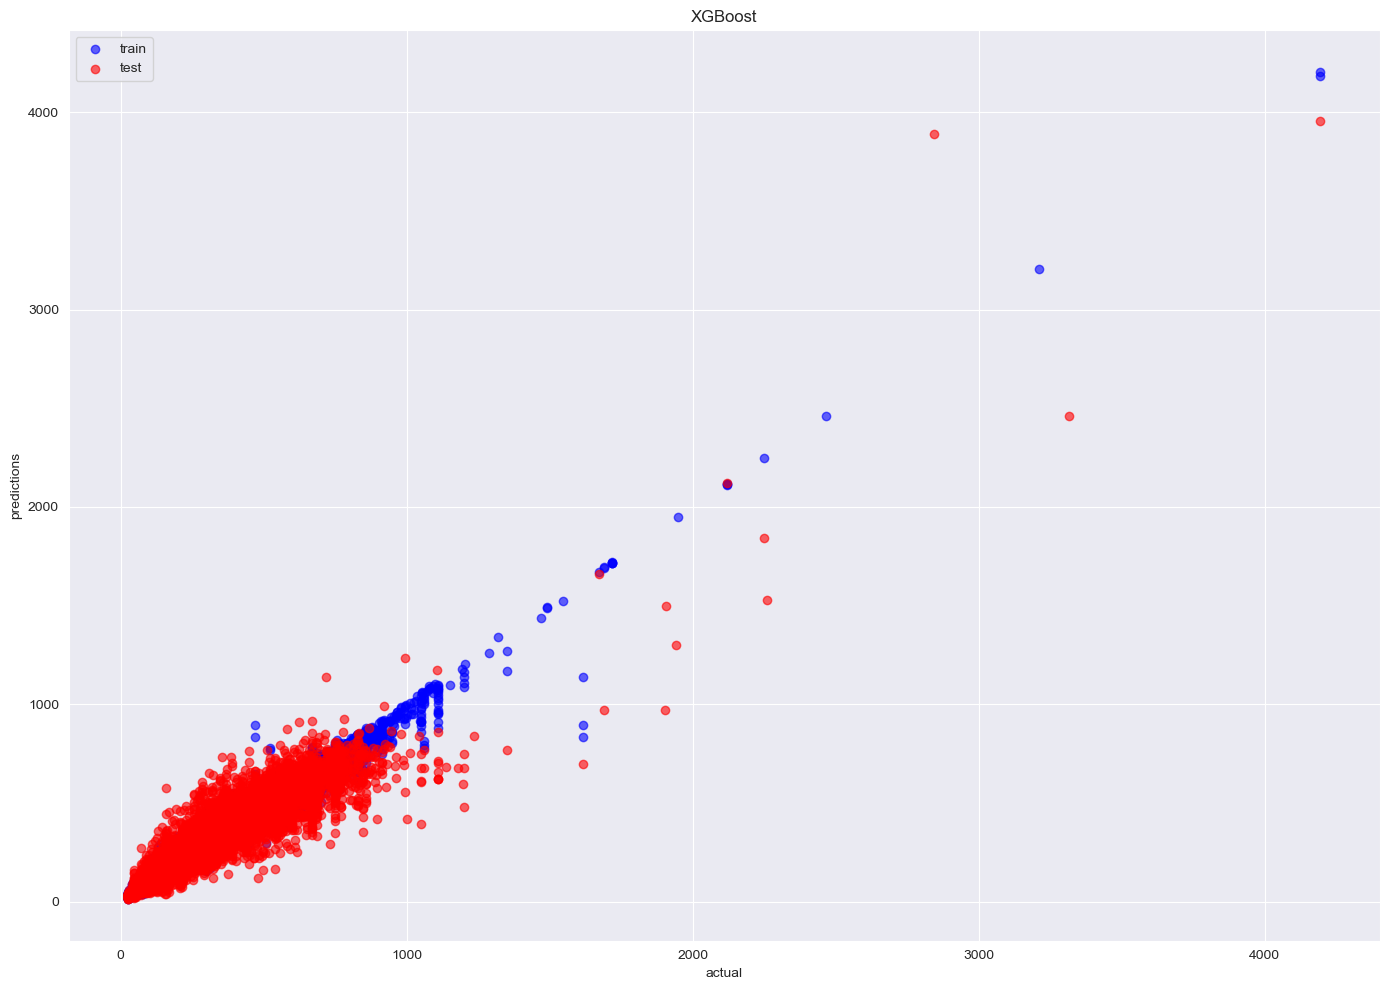

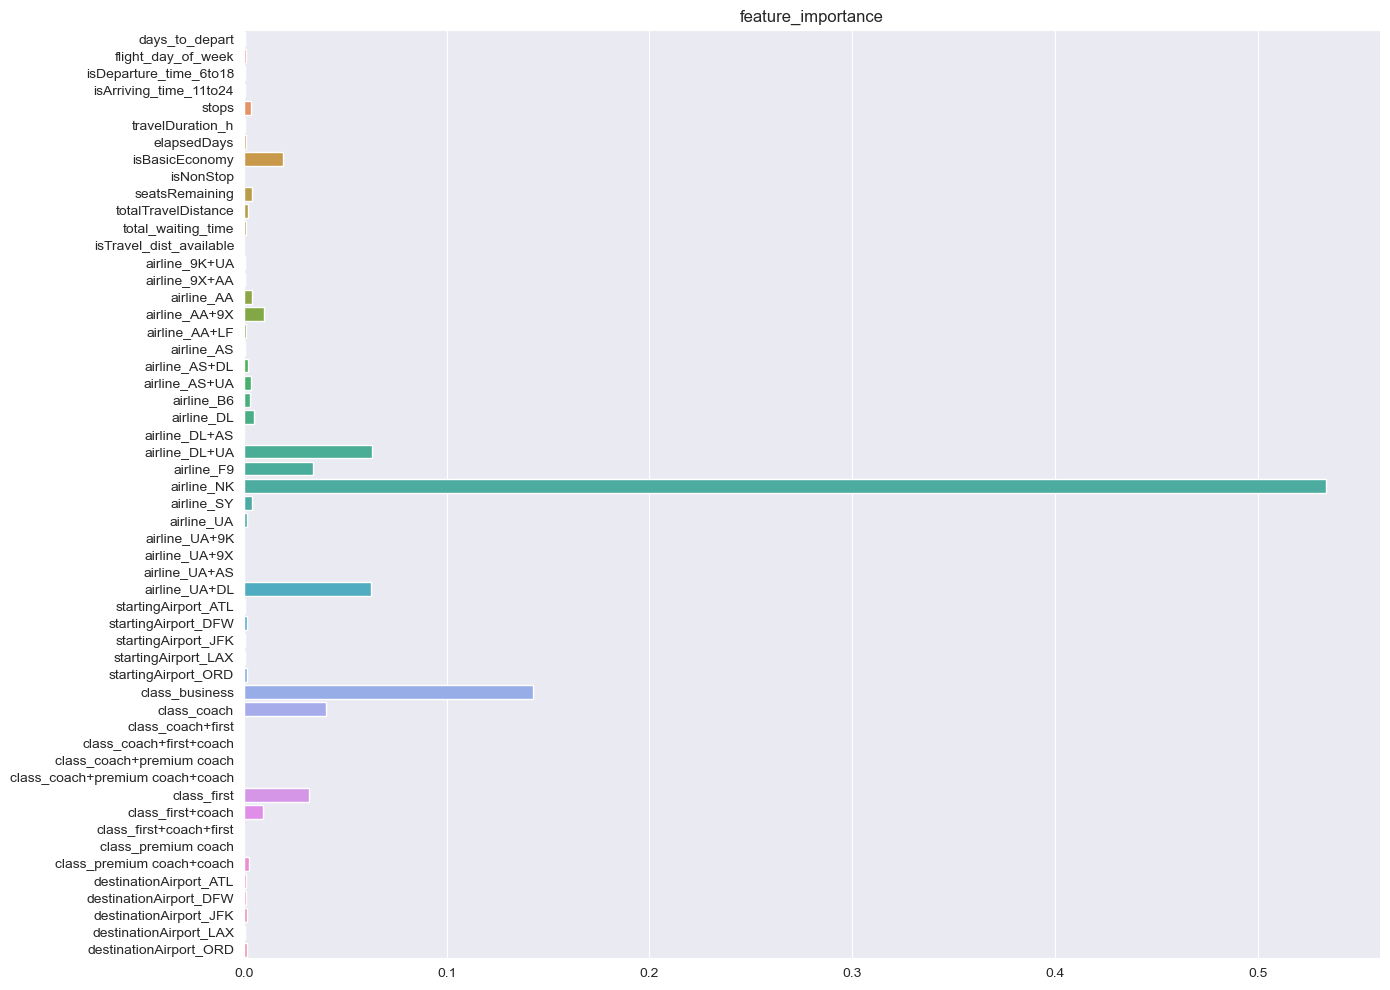

In [14]:
# best para: 150, 10 alpha = 1/2, by GridsearchCV
xgb_model_with_L1 = Reg_models.XGBR(search=False, best_depth_input=10, best_Nestimators=200, show_avsp=True,
                                    show_features_imp=True, search_L1_alpha=False, L1_alpha=1.2)

### NN using BMSE

In [15]:
seq_NN_with_Bmse = Reg_models.NN_sequential(epoch_num=100, loss_func='bmc', bmc_noise_var=220)

Epoch 1/100
237/237 [==============================] - 2s 6ms/step - loss: 43544.6370 - r_squared: -0.6369
Epoch 2/100
237/237 [==============================] - 1s 6ms/step - loss: 8646.8677 - r_squared: 0.7319
Epoch 3/100
237/237 [==============================] - 1s 6ms/step - loss: 8219.6708 - r_squared: 0.7561
Epoch 4/100
237/237 [==============================] - 1s 6ms/step - loss: 8119.7480 - r_squared: 0.7603
Epoch 5/100
237/237 [==============================] - 2s 7ms/step - loss: 7887.8170 - r_squared: 0.7576
Epoch 6/100
237/237 [==============================] - 1s 6ms/step - loss: 7524.7593 - r_squared: 0.7793
Epoch 7/100
237/237 [==============================] - 1s 6ms/step - loss: 7596.5631 - r_squared: 0.7781
Epoch 8/100
237/237 [==============================] - 1s 6ms/step - loss: 7434.1719 - r_squared: 0.7861
Epoch 9/100
237/237 [==============================] - 1s 6ms/step - loss: 7106.4848 - r_squared: 0.7976
Epoch 10/100
237/237 [==============================]

### Using MAPE
When you change your loss function from Mean Squared Error (MSE) to Mean Absolute Percentage Error (MAPE), you are changing the way your model learns from the training data. MSE is a popular loss function for regression problems, and it penalizes the model more for large errors. MAPE, on the other hand, penalizes the model more for large errors relative to the true value.

It is possible that changing the loss function from MSE to MAPE is causing your R-squared value to decrease. One possible reason is that MAPE may not be as sensitive to small changes in the predictions as MSE. As a result, your model may not be penalized enough for small errors in the predictions, leading to a lower R-squared value.

Another reason could be that MAPE is a relative error metric, and it may not be suitable for all types of data. For example, if your data contains many zero values, MAPE may not be an appropriate loss function as it can result in infinite or undefined values.

In [6]:
seq_NN_with_mape = Reg_models.NN_sequential(epoch_num=100, loss_func='mape')

2023-04-19 15:11:06.862459: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-19 15:11:06.865478: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 15:11:06.963959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
237/237 [==============================] - 2s 6ms/step - loss: 0.1691 - r_squared: -0.7102
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0691 - r_squared: 0.6859
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0667 - r_squared: 0.6991
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0645 - r_squared: 0.7162
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0638 - r_squared: 0.7146
Epoch 6/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0631 - r_squared: 0.7164
Epoch 7/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0613 - r_squared: 0.7257
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0597 - r_squared: 0.7333
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 0.0588 - r_squared: 0.7422
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - loss: 0.058

### Using Huber Loss
 Huber loss function is another option that can handle high positive skewness data. The Huber loss function is less sensitive to outliers than the standard least squares loss function and can be a good fit for data with high skewness and outliers.

In [7]:
seq_NN_with_huber = Reg_models.NN_sequential(epoch_num=100, loss_func='huber',huber_delta=1)

Epoch 1/100


TypeError: in user code:

    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/davidmao/Desktop/LSE/MA429_Data_Mining/GroupProject/Modeling_reg.py:159 huber_loss  *
        large_res = huber_delta * residual - 0.5 * tf.square(huber_delta)
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/ops/math_ops.py:1194 r_binary_op_wrapper
        x = ops.convert_to_tensor(x, dtype=y.dtype.base_dtype, name="x")
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/profiler/trace.py:163 wrapped
        return func(*args, **kwargs)
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1540 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/tensor_conversion_registry.py:52 _default_conversion_function
        return constant_op.constant(value, dtype, name=name)
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:264 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:281 _constant_impl
        tensor_util.make_tensor_proto(
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/tensor_util.py:457 make_tensor_proto
        _AssertCompatible(values, dtype)
    /Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/framework/tensor_util.py:336 _AssertCompatible
        raise TypeError("Expected %s, got %s of type '%s' instead." %

    TypeError: Expected int32, got 0.5 of type 'float' instead.


## We shall also reconsider the features engineering based on the importance of XGBoost and EDA

Noticed that during trianing, for each epoch, we have rmse around 58. But during the whole testing, the mse seems to be large. A possible reason is, our model did not learn well for large pricing, leading to large test mse.

Detect the abnormal price, using autoencoder model

In [15]:
# We reconsider the features we used to train our model, this time we drop the features with low importance related to XGBoost
x_train_new = x_train[xgb_features_imp_df['features'].tolist()[:-6]]
x_test_new = x_test[xgb_features_imp_df['features'].tolist()[:-6]]

In [16]:
Reg_models_new = Regression_models(x_train_new, y_train, x_test_new, y_test, standardlise=True)

Best parameters:  {'n_estimators': 200, 'max_depth': 10, 'alpha': 1}
XGBR train R_sq:  0.9786744926557194
XGBR train MSE:  625.8087924882228
XGBR test R_sq:  0.8686526401264298
XGBR test MSE:  4197.33886109075


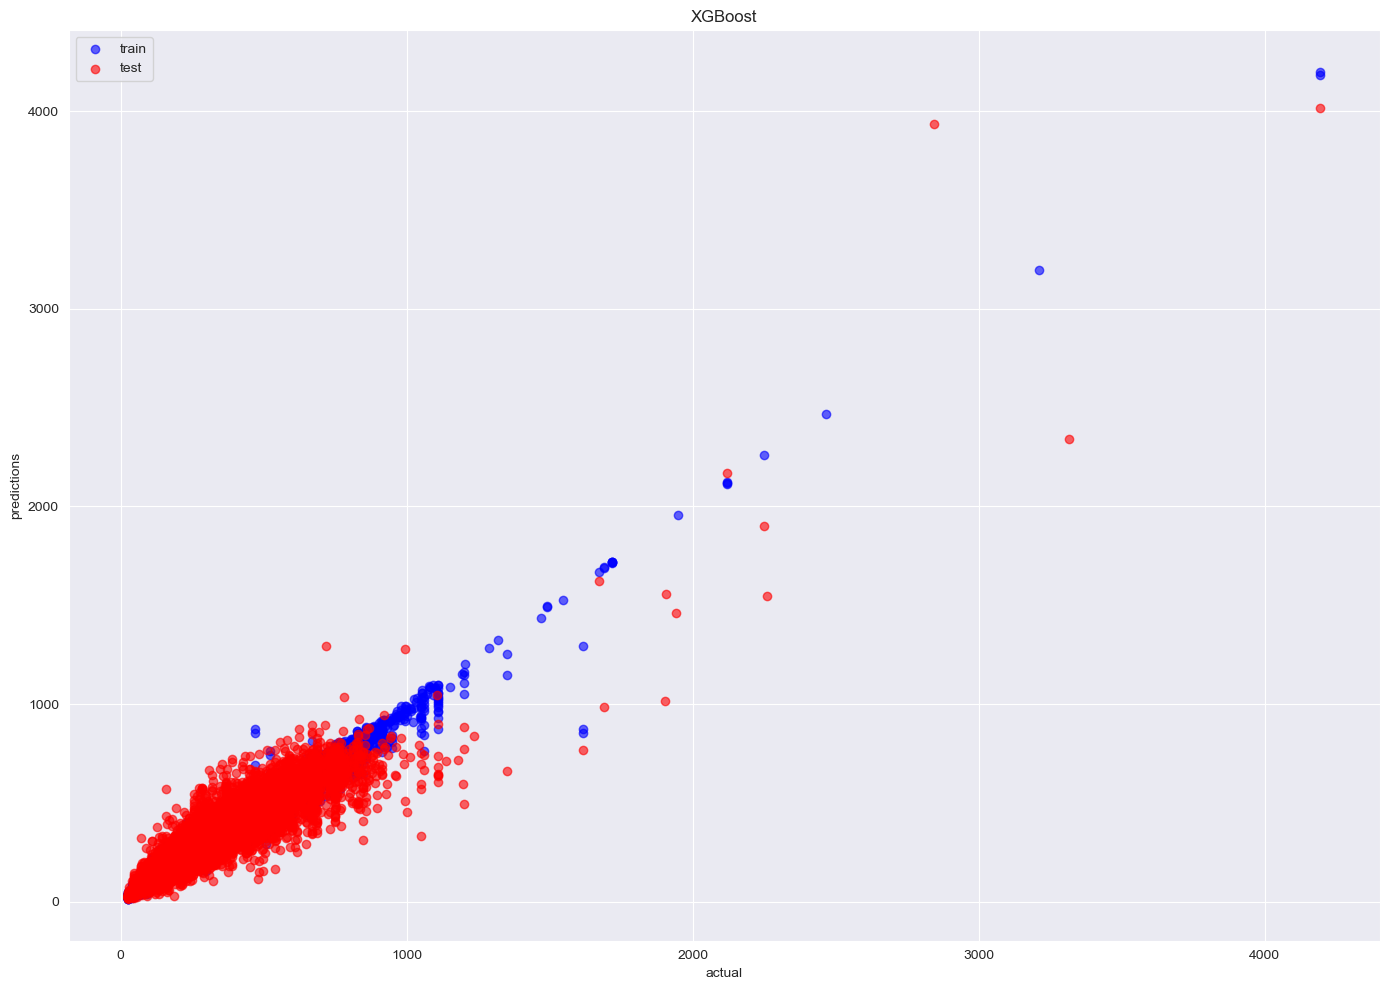

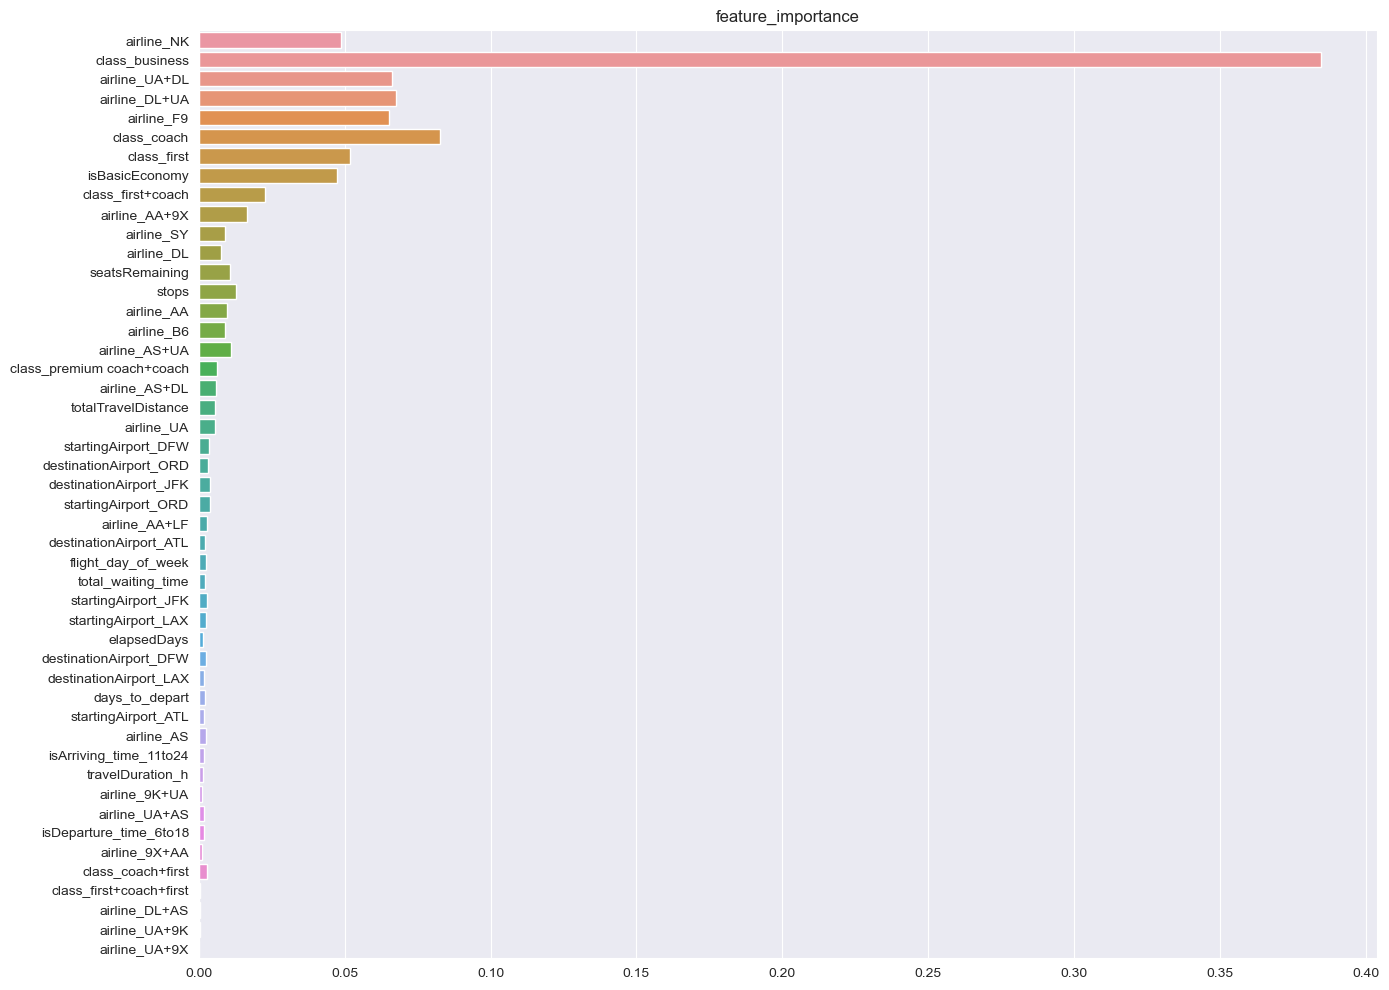

In [19]:
xgb_model_with_L1_new = Reg_models_new.XGBR(search=False, best_depth_input=10, best_Nestimators=200, show_avsp=True,
                                            show_features_imp=True, search_L1_alpha=False, L1_alpha=1)

In [27]:
seq_NN_new = Reg_models_new.NN_sequential(epoch_num=100, loss_func='rmse', bmc_noise_var=None)

Epoch 1/100
237/237 [==============================] - 2s 6ms/step - loss: 182.3724 - r_squared: -0.5390
Epoch 2/100
237/237 [==============================] - 1s 5ms/step - loss: 85.3555 - r_squared: 0.7473
Epoch 3/100
237/237 [==============================] - 1s 5ms/step - loss: 82.4996 - r_squared: 0.7613
Epoch 4/100
237/237 [==============================] - 1s 5ms/step - loss: 83.0942 - r_squared: 0.7624
Epoch 5/100
237/237 [==============================] - 1s 5ms/step - loss: 80.9676 - r_squared: 0.7721
Epoch 6/100
237/237 [==============================] - 1s 5ms/step - loss: 80.9234 - r_squared: 0.7708
Epoch 7/100
237/237 [==============================] - 1s 5ms/step - loss: 80.5689 - r_squared: 0.7771
Epoch 8/100
237/237 [==============================] - 1s 5ms/step - loss: 78.5987 - r_squared: 0.7841
Epoch 9/100
237/237 [==============================] - 1s 5ms/step - loss: 77.4306 - r_squared: 0.7920
Epoch 10/100
237/237 [==============================] - 1s 5ms/step - l

In [12]:
seq_NN_new_with_bmse = Reg_models_new.NN_sequential(epoch_num=100, loss_func='bmc', bmc_noise_var=200)

Epoch 1/100
237/237 [==============================] - 2s 6ms/step - loss: 44157.3107 - r_squared: -0.6406
Epoch 2/100
237/237 [==============================] - 1s 6ms/step - loss: 8515.4513 - r_squared: 0.7353
Epoch 3/100
237/237 [==============================] - 1s 6ms/step - loss: 8076.7702 - r_squared: 0.7493
Epoch 4/100
237/237 [==============================] - 1s 6ms/step - loss: 7787.2843 - r_squared: 0.7611
Epoch 5/100
237/237 [==============================] - 1s 6ms/step - loss: 7706.6879 - r_squared: 0.7656
Epoch 6/100
237/237 [==============================] - 1s 6ms/step - loss: 7428.9293 - r_squared: 0.7418
Epoch 7/100
237/237 [==============================] - 1s 6ms/step - loss: 7215.0908 - r_squared: 0.7756
Epoch 8/100
237/237 [==============================] - 1s 6ms/step - loss: 7068.3768 - r_squared: 0.7862
Epoch 9/100
237/237 [==============================] - 1s 6ms/step - loss: 7010.2727 - r_squared: 0.7684
Epoch 10/100
237/237 [==============================]

It is clear that it does not help us to improve the model performance

We shall consider split the abnormal price and build a model to detect those prices.

## We test the model performance
### Now, say we have two models, say a linear regression model and a neural network. How can we say which model is better? We can do K-fold cross-validation and see which one proves better at predicting the test set points. But once we have used cross-validation to select the better performing model, we train that model (whether it be the linear regression or the neural network) on all the data. We don't use the actual model instances we trained during cross-validation for our final predictive model.